In [1]:
import PySimpleGUI as sg
import numpy as np
import matplotlib.pyplot as plt
import os

# import gridspec
import matplotlib.gridspec as gridspec

In [2]:
stat_path = r'F:\treadmill_gaze_control\recordings\230306_DMM_DMM001_eyecams\R01\TwoPhotonTimeSeries\suite2p\plane0\stat.npy'

In [3]:
s2p_dir = os.path.split(stat_path)[0]

In [4]:
ops_path = os.path.join(s2p_dir, 'ops.npy')
ops = np.load(ops_path, allow_pickle=True)

In [5]:
F_path = os.path.join(s2p_dir, 'F.npy')
F = np.load(F_path)
Fneu_path = os.path.join(s2p_dir, 'Fneu.npy')
Fneu = np.load(Fneu_path)
# spks_path = os.path.join(s2p_dir, 'spks.npy')
# spks = np.load(spks_path)
iscell_path = os.path.join(s2p_dir, 'iscell.npy')
iscell = np.load(iscell_path)

In [6]:
stat = np.load(stat_path, allow_pickle=True)

In [7]:
sorted(list(ops.item().keys()))

['1Preg',
 'Lx',
 'Lxc',
 'Ly',
 'Lyc',
 'Vcorr',
 'Vmap',
 'Vmax',
 'Vsplit',
 'align_by_chan',
 'allow_overlap',
 'anatomical_only',
 'aspect',
 'badframes',
 'baseline',
 'batch_size',
 'bidi_corrected',
 'bidiphase',
 'block_size',
 'bruker',
 'bruker_bidirectional',
 'cellprob_threshold',
 'chan2_thres',
 'classifier_path',
 'combined',
 'connected',
 'corrXY',
 'corrXY1',
 'data_path',
 'date_proc',
 'delete_bin',
 'denoise',
 'diameter',
 'do_bidiphase',
 'do_registration',
 'fast_disk',
 'filelist',
 'first_tiffs',
 'flow_threshold',
 'force_refImg',
 'force_sktiff',
 'frames_include',
 'frames_per_file',
 'frames_per_folder',
 'fs',
 'functional_chan',
 'h5py',
 'h5py_key',
 'high_pass',
 'ignore_flyback',
 'ihop',
 'inner_neuropil_radius',
 'input_format',
 'keep_movie_raw',
 'lam_percentile',
 'look_one_level_down',
 'max_iterations',
 'max_overlap',
 'max_proj',
 'maxregshift',
 'maxregshiftNR',
 'meanImg',
 'meanImgE',
 'mesoscan',
 'min_neuropil_pixels',
 'move_bin',
 'mu

In [8]:
inds = np.arange(np.size(iscell,0))
inds

array([   0,    1,    2, ..., 3352, 3353, 3354])

In [9]:
goodcells = inds[iscell[:,0]==1]

In [10]:
stats = {
    'prob': np.zeros(len(inds))*np.nan,
    'rad': np.zeros(len(inds))*np.nan,
    'aspect': np.zeros(len(inds))*np.nan,
    'cmpt': np.zeros(len(inds))*np.nan,
    'std': np.zeros(len(inds))*np.nan,
    'ovrlap': np.zeros(len(inds))*np.nan,
    'snr': np.zeros(len(inds))*np.nan,
    'auto_label': np.zeros(len(inds))*np.nan,
    'hand_label': np.zeros(len(inds))*np.nan
}
for n in inds:
    stats['prob'][n] = iscell[n][1]
    stats['rad'][n] = stat[n]['radius']
    stats['aspect'][n] = stat[n]['aspect_ratio']
    stats['cmpt'][n] = (1/stat[n]['compact'])*100
    stats['std'][n] = stat[n]['std']
    stats['ovrlap'][n] = np.sum(stat[n]['overlap']) / len(stat[n]['overlap'])
    stats['snr'][n] = np.median(F[n,:] / Fneu[n,:])

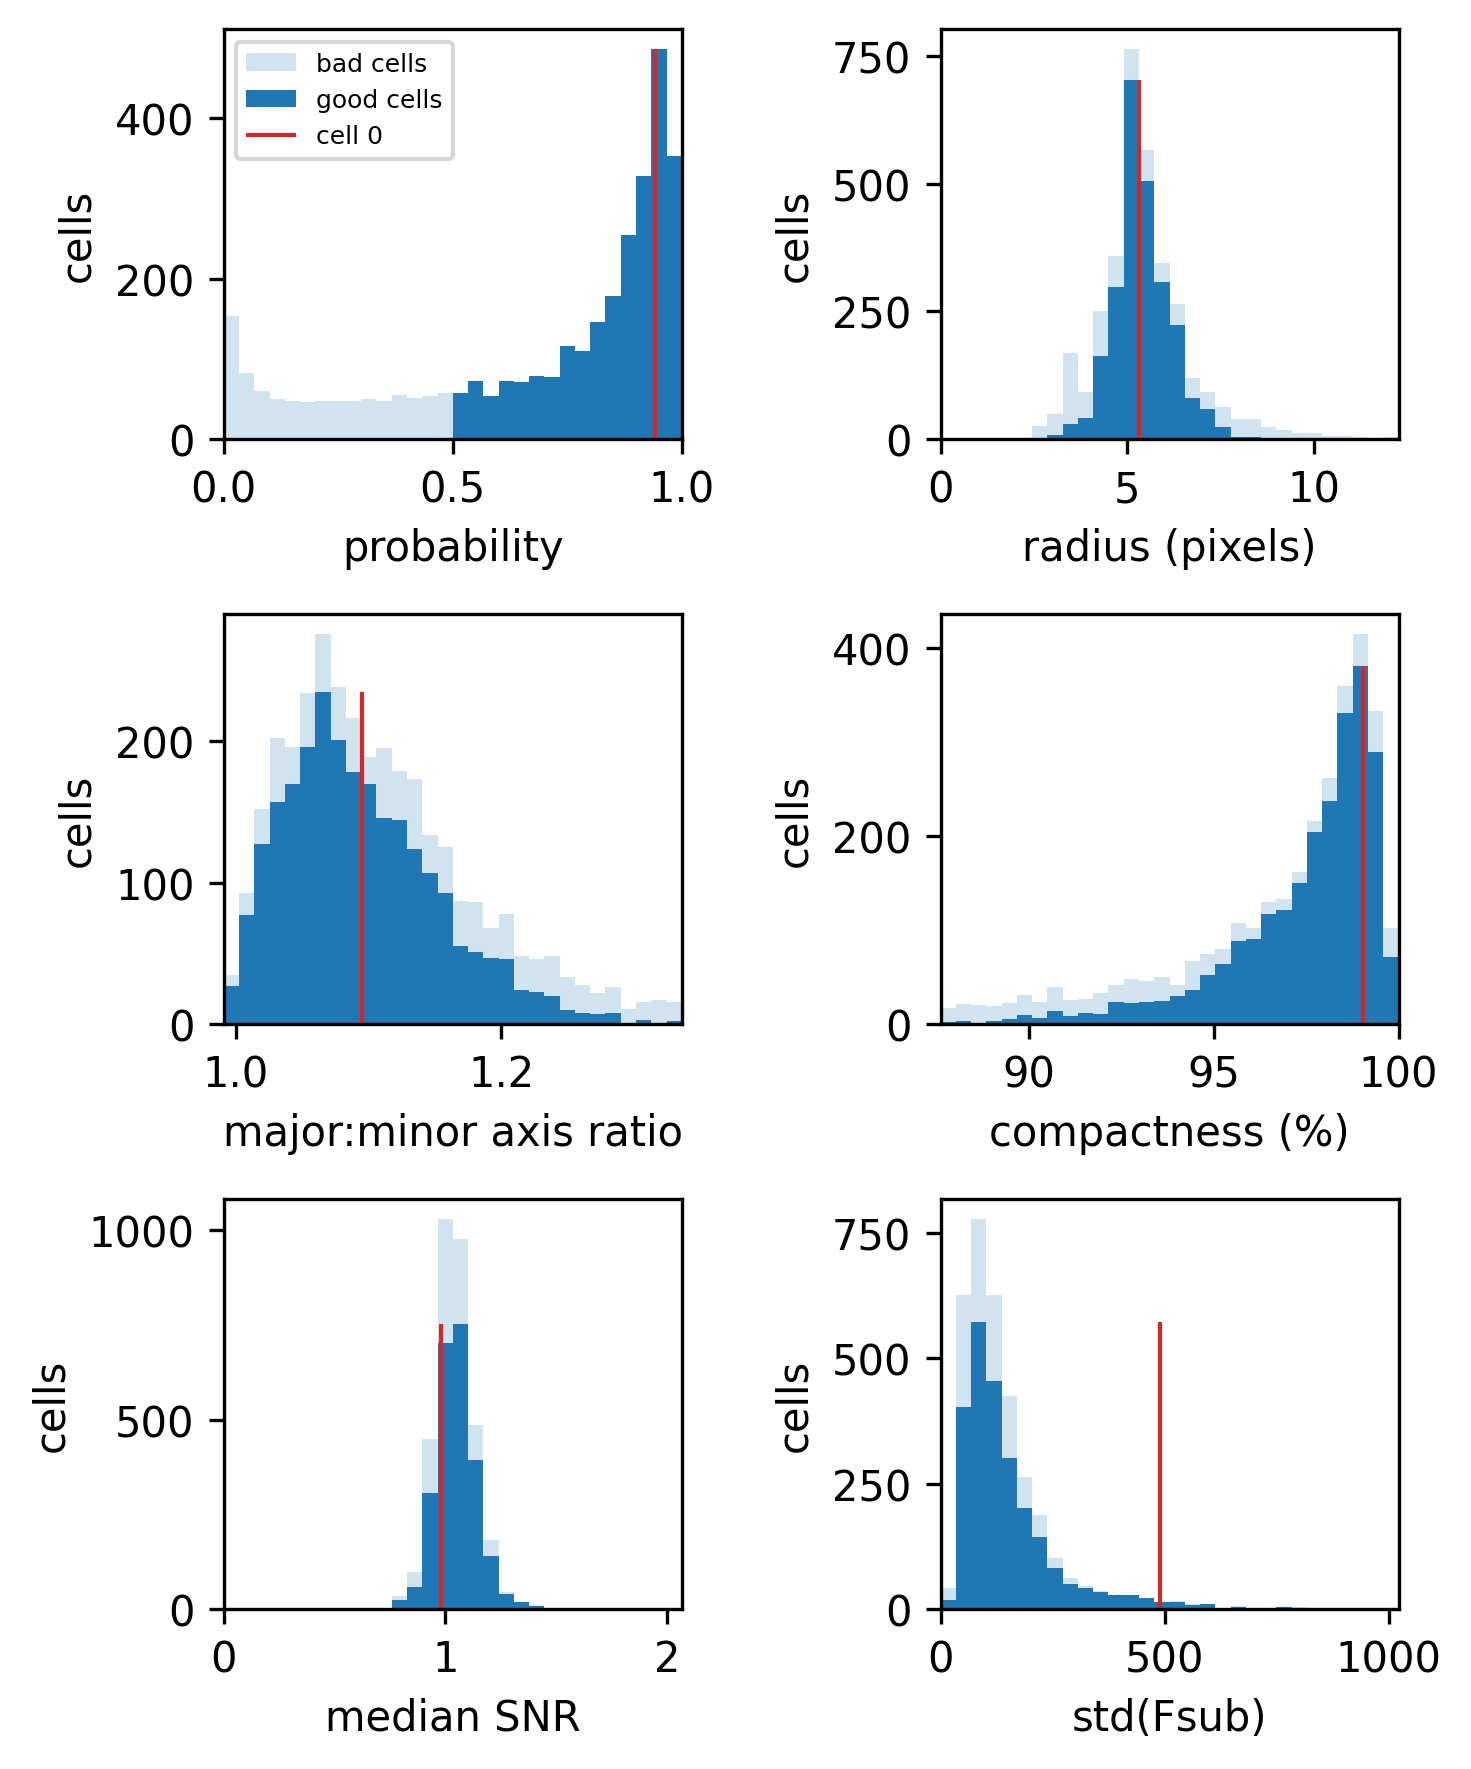

In [11]:
fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(3,2, figsize=(5,6), dpi=300)

ax0.hist(stats['prob'], bins=np.linspace(0,1,31),
         histtype='stepfilled', color='tab:blue', linewidth=1,
         alpha=0.2, label='bad cells')
h, _, _ = ax0.hist(stats['prob'][goodcells], bins=np.linspace(0,1,31),
         histtype='stepfilled', color='tab:blue', linewidth=1,
         label='good cells')
ax0.vlines(stats['prob'][0], 0, np.max(h), color='tab:red', linewidth=1,
           label='cell {}'.format(0))
ax0.legend(fontsize=6, loc='upper left')
ax0.set_xlim([0,1])
ax0.set_xlabel('probability')
ax0.set_ylabel('cells')

_usemax = np.max(stats['rad'][goodcells])+3
ax1.hist(stats['rad'], bins=np.linspace(0,_usemax,31),
         histtype='stepfilled', color='tab:blue', linewidth=1,
         alpha=0.2, label='bad cells')
h, _, _ = ax1.hist(stats['rad'][goodcells], bins=np.linspace(0,_usemax,31),
            histtype='stepfilled', color='tab:blue', linewidth=1, label='good cells')
ax1.vlines(stats['rad'][0], 0, np.max(h), color='tab:red', linewidth=1,
           label='cell {}'.format(0))
ax1.set_xlim([0, _usemax])
ax1.set_ylabel('cells')
ax1.set_xlabel('radius (pixels)')

_usemin = np.min(stats['aspect'][goodcells])
_usemax = np.max(stats['aspect'][goodcells])
ax2.hist(stats['aspect'], bins=np.linspace(_usemin,_usemax,31),
         color='tab:blue', linewidth=1, alpha=0.2, label='bad cells',
            histtype='stepfilled')
h, _, _ = ax2.hist(stats['aspect'][goodcells], bins=np.linspace(_usemin,_usemax,31),
            color='tab:blue', linewidth=1, label='good cells', histtype='stepfilled')
ax2.vlines(stats['aspect'][0], 0, np.max(h), color='tab:red', linewidth=1,
              label='cell {}'.format(0))
ax2.set_xlim([_usemin, _usemax])
ax2.set_ylabel('cells')
ax2.set_xlabel('major:minor axis ratio')

_usemin = np.min(stats['cmpt'][goodcells])
ax3.hist(stats['cmpt'], bins=np.linspace(_usemin,100,31), histtype='stepfilled',
         color='tab:blue', linewidth=1, alpha=0.2, label='bad cells')
h, _, _ = ax3.hist(stats['cmpt'][goodcells], bins=np.linspace(_usemin,100,31),
                   color='tab:blue', linewidth=1, label='good cells', histtype='stepfilled')
ax3.vlines(stats['cmpt'][0], 0, np.max(h), color='tab:red', linewidth=1,
              label='cell {}'.format(0))
ax3.set_xlim([_usemin, 100])
ax3.set_ylabel('cells')
ax3.set_xlabel('compactness (%)')

_usemin = np.min(stats['snr'][goodcells])
_usemax = np.max(stats['snr'][goodcells])
ax4.hist(stats['snr'], bins=np.linspace(_usemin,_usemax,31),
         color='tab:blue', linewidth=1, alpha=0.2, label='bad cells',
            histtype='stepfilled')
h, _, _ = ax4.hist(stats['snr'][goodcells], bins=np.linspace(_usemin,_usemax,31),
            color='tab:blue', linewidth=1, label='good cells', histtype='stepfilled')
ax4.vlines(stats['snr'][0], 0, np.max(h), color='tab:red', linewidth=1,
               label='cell {}'.format(0))
ax4.set_xlim([_usemin, _usemax])
ax4.set_ylabel('cells')
ax4.set_xlabel('median SNR')

_usemax = np.max(stats['std'][goodcells])
ax5.hist(stats['std'], bins=np.linspace(0,_usemax,31),
         color='tab:blue', linewidth=1, alpha=0.2, label='bad cells',
            histtype='stepfilled')
h, _, _ = ax5.hist(stats['std'][goodcells], bins=np.linspace(0,_usemax,31),
            color='tab:blue', linewidth=1, label='good cells', histtype='stepfilled')
ax5.vlines(stats['std'][0], 0, np.max(h), color='tab:red', linewidth=1,
               label='cell {}'.format(0))
ax5.set_xlim([0, _usemax])
ax5.set_ylabel('cells')
ax5.set_xlabel('std(Fsub)')

fig.tight_layout()

In [27]:
Fsub = F[0].copy() - Fneu[0].copy()

fakeT = np.linspace(0, 3530/10/60, np.size(F, 1))

In [29]:

xy = np.stack([stat[0]['xpix'], stat[0]['ypix']])
d = stat[0]['radius'] * 3
bbox_x = ([np.min(xy[0,:]-d), np.max(xy[0,:])+d])
bbox_y = ([np.max(xy[1,:])+d, np.min(xy[1,:]-d)])

maxproj = ops.item()['max_proj'].copy()
meanim = ops.item()['meanImg'].copy()

cell_mask = np.zeros(meanim.shape)
cell_mask[xy[1,:], xy[0,:]] = 1

In [61]:
fig.get_size_inches()*150

array([1275.,  600.])

In [63]:
400/1275

0.3137254901960784

In [65]:
600*.31372

188.232

In [59]:
fig.get_size_inches()[0]*71

603.5

(700.0724618131918, 745.9275381868082, 399.9275381868082, 359.0724618131918)

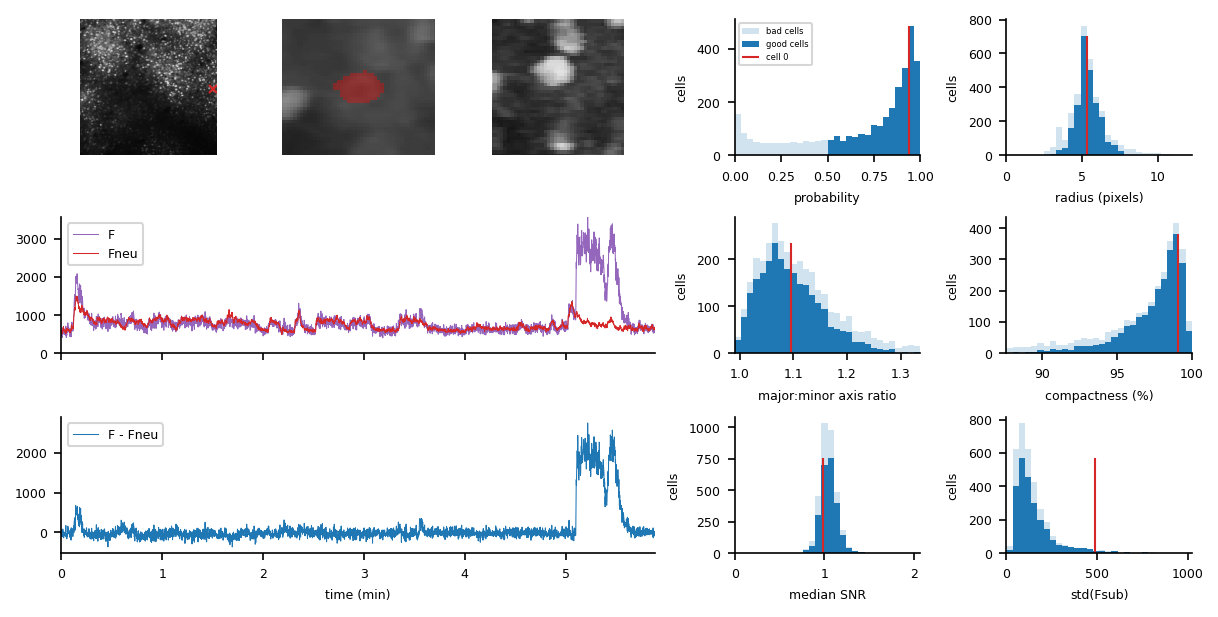

In [52]:
fig = plt.figure(constrained_layout=True, figsize=(8.5,4), dpi=150)
spec = gridspec.GridSpec(nrows=3, ncols=11, figure=fig, wspace=0.05, hspace=0.05)

im1 = fig.add_subplot(spec[0, 0:2])
im2 = fig.add_subplot(spec[0, 2:4])
im3 = fig.add_subplot(spec[0, 4:6])

trace1 = fig.add_subplot(spec[1,:6])
trace2 = fig.add_subplot(spec[2,:6])

prop1 = fig.add_subplot(spec[0,6:8])
prop2 = fig.add_subplot(spec[0,8:10])
prop3 = fig.add_subplot(spec[1,6:8])
prop4 = fig.add_subplot(spec[1,8:10])
prop5 = fig.add_subplot(spec[2,6:8])
prop6 = fig.add_subplot(spec[2,8:10])


prop1.hist(stats['prob'], bins=np.linspace(0,1,31),
         histtype='stepfilled', color='tab:blue', linewidth=1,
         alpha=0.2, label='bad cells')
h, _, _ = prop1.hist(stats['prob'][goodcells], bins=np.linspace(0,1,31),
         histtype='stepfilled', color='tab:blue', linewidth=1,
         label='good cells')
prop1.vlines(stats['prob'][0], 0, np.max(h), color='tab:red', linewidth=1,
           label='cell {}'.format(0))
prop1.legend(fontsize=4, loc='upper left')
prop1.set_xlim([0,1])
prop1.set_xlabel('probability')
prop1.set_ylabel('cells')

_usemax = np.max(stats['rad'][goodcells])+3
prop2.hist(stats['rad'], bins=np.linspace(0,_usemax,31),
         histtype='stepfilled', color='tab:blue', linewidth=1,
         alpha=0.2, label='bad cells')
h, _, _ = prop2.hist(stats['rad'][goodcells], bins=np.linspace(0,_usemax,31),
            histtype='stepfilled', color='tab:blue', linewidth=1, label='good cells')
prop2.vlines(stats['rad'][0], 0, np.max(h), color='tab:red', linewidth=1,
           label='cell {}'.format(0))
prop2.set_xlim([0, _usemax])
prop2.set_ylabel('cells')
prop2.set_xlabel('radius (pixels)')

_usemin = np.min(stats['aspect'][goodcells])
_usemax = np.max(stats['aspect'][goodcells])
prop3.hist(stats['aspect'], bins=np.linspace(_usemin,_usemax,31),
         color='tab:blue', linewidth=1, alpha=0.2, label='bad cells',
            histtype='stepfilled')
h, _, _ = prop3.hist(stats['aspect'][goodcells], bins=np.linspace(_usemin,_usemax,31),
            color='tab:blue', linewidth=1, label='good cells', histtype='stepfilled')
prop3.vlines(stats['aspect'][0], 0, np.max(h), color='tab:red', linewidth=1,
              label='cell {}'.format(0))
prop3.set_xlim([_usemin, _usemax])
prop3.set_ylabel('cells')
prop3.set_xlabel('major:minor axis ratio')

_usemin = np.min(stats['cmpt'][goodcells])
prop4.hist(stats['cmpt'], bins=np.linspace(_usemin,100,31), histtype='stepfilled',
         color='tab:blue', linewidth=1, alpha=0.2, label='bad cells')
h, _, _ = prop4.hist(stats['cmpt'][goodcells], bins=np.linspace(_usemin,100,31),
                   color='tab:blue', linewidth=1, label='good cells', histtype='stepfilled')
prop4.vlines(stats['cmpt'][0], 0, np.max(h), color='tab:red', linewidth=1,
              label='cell {}'.format(0))
prop4.set_xlim([_usemin, 100])
prop4.set_ylabel('cells')
prop4.set_xlabel('compactness (%)')

_usemin = np.min(stats['snr'][goodcells])
_usemax = np.max(stats['snr'][goodcells])
prop5.hist(stats['snr'], bins=np.linspace(_usemin,_usemax,31),
         color='tab:blue', linewidth=1, alpha=0.2, label='bad cells',
            histtype='stepfilled')
h, _, _ = prop5.hist(stats['snr'][goodcells], bins=np.linspace(_usemin,_usemax,31),
            color='tab:blue', linewidth=1, label='good cells', histtype='stepfilled')
prop5.vlines(stats['snr'][0], 0, np.max(h), color='tab:red', linewidth=1,
               label='cell {}'.format(0))
prop5.set_xlim([_usemin, _usemax])
prop5.set_ylabel('cells')
prop5.set_xlabel('median SNR')

_usemax = np.max(stats['std'][goodcells])
prop6.hist(stats['std'], bins=np.linspace(0,_usemax,31),
         color='tab:blue', linewidth=1, alpha=0.2, label='bad cells',
            histtype='stepfilled')
h, _, _ = prop6.hist(stats['std'][goodcells], bins=np.linspace(0,_usemax,31),
            color='tab:blue', linewidth=1, label='good cells', histtype='stepfilled')
prop6.vlines(stats['std'][0], 0, np.max(h), color='tab:red', linewidth=1,
               label='cell {}'.format(0))
prop6.set_xlim([0, _usemax])
prop6.set_ylabel('cells')
prop6.set_xlabel('std(Fsub)')

trace1.plot(fakeT, F[0], linewidth=0.5, color='tab:purple', label='F')
trace1.plot(fakeT, Fneu[0], linewidth=0.5, color='tab:red', label='Fneu')
trace1.set_ylim([0, np.max([np.max(F[0]), np.max(Fneu[0])])])
trace1.legend(fontsize=6)
trace1.set_xlim([0, fakeT[-1]])
trace1.set_xticks(np.arange(0, fakeT[-1], np.round(fakeT[-1]/6, 1)).astype(int), labels=[])

trace2.plot(fakeT, Fsub, linewidth=0.5, color='tab:blue', label='F - Fneu')
# ax1.set_ylim(0, np.max(Fsub))
trace2.legend(fontsize=6)
trace2.set_xlim([0, fakeT[-1]])
trace2.set_xticks(np.arange(0, fakeT[-1], np.round(fakeT[-1]/6, 1)).astype(int))
trace2.set_xlabel('time (min)')

im1.imshow(maxproj, cmap='gray', vmin=0)
im1.plot(np.median(xy[0,:]),
         np.median(xy[1,:]),'x', color='tab:red', markersize=4)
im1.axis('off')

im2.imshow(meanim, cmap='gray')
im2.imshow(cell_mask, cmap=t2b, alpha=0.35)
im2.set_xlim(bbox_x)
im2.set_ylim(bbox_y)
im2.axis('off')

im3.imshow(maxproj, cmap='gray')
im3.set_xlim(bbox_x)
im3.set_ylim(bbox_y)
im3.axis('off')


In [20]:
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# decrease font size
mpl.rcParams['font.size'] = 6


(array([  6.,  27., 118., 315., 613., 772., 571., 403., 184., 113.,  61.,
         28.,  27.,   8.,   6.,   1.,   3.,   1.,   4.,   6.,   1.,   5.,
          6.,   3.,   3.,   3.,   3.,   2.,   6.,   4.,   0.,   3.,   5.,
          4.,   3.,  10.,  11.,  12.,  12.,  16.,   9.,  10.,  13.,  14.,
         11.,  16.,  14.,  11.,  12.,   6.,   8.,   7.,   6.,   3.,   2.,
          4.,   7.,   2.,   0.,   2.]),
 array([0.61019158, 0.67290992, 0.73562831, 0.79834664, 0.86106497,
        0.9237833 , 0.98650169, 1.04921997, 1.11193836, 1.17465675,
        1.23737502, 1.30009341, 1.3628118 , 1.42553008, 1.48824847,
        1.55096674, 1.61368513, 1.67640352, 1.73912179, 1.80184019,
        1.86455858, 1.92727685, 1.98999524, 2.05271363, 2.11543202,
        2.17815018, 2.24086857, 2.30358696, 2.36630535, 2.42902374,
        2.49174213, 2.55446029, 2.61717868, 2.67989707, 2.74261546,
        2.80533385, 2.86805201, 2.9307704 , 2.99348879, 3.05620718,
        3.11892557, 3.18164372, 3.24436212, 3.

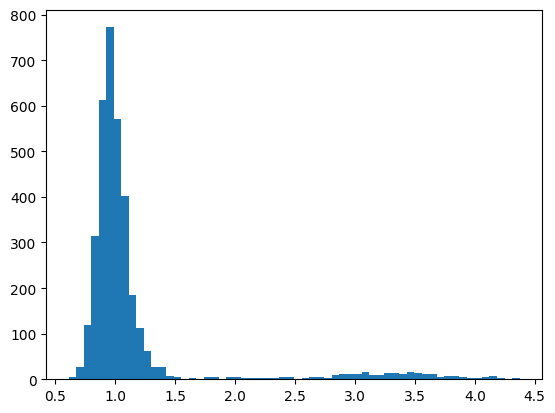

In [215]:
plt.hist((F[0]/Fneu[0]), bins=60)

In [164]:
props_list = [
    'suite2P probability: {:.3}%'.format(iscell[0][1]),
    'radius: {:.3} pxls'.format(stat[0]['radius']),
    'aspect ratio: {:.3}'.format(stat[0]['aspect_ratio']),
    'compactness: {:.3}'.format((1/stat[0]['compact'])*100),
    'F std: {:.5}'.format(stat[0]['std']),
    'ROI overlap: {:.3}%'.format(np.sum(stat[0]['overlap']) / len(stat[0]['overlap'])),
    'SNR: {}'.format(np.median(F[0]/Fneu[0])),
]
props_list

['suite2P probability: 0.942%',
 'radius: 5.31 pxls',
 'aspect ratio: 1.1',
 'compactness: 99.1',
 'F std: 490.82',
 'ROI overlap: 0.699%']

In [150]:
(1/stat[0]['compact'])*100

99.0527045967938

In [59]:
sorted(list(stat[0].keys()))

['aspect_ratio',
 'compact',
 'footprint',
 'lam',
 'med',
 'mrs',
 'mrs0',
 'neuropil_mask',
 'npix',
 'npix_norm',
 'npix_norm_no_crop',
 'npix_soma',
 'overlap',
 'radius',
 'skew',
 'solidity',
 'soma_crop',
 'std',
 'xpix',
 'ypix']

In [96]:
ops.item()['maxregshift']

0.1

In [31]:
from matplotlib.colors import ListedColormap
t2b = np.zeros([256, 4])
t2b[:,0] = np.ones(256)
t2b[:,3] = np.linspace(0, 1, 256)
t2b = ListedColormap(t2b)

In [65]:
ops.item()['max_proj'].max()

3093.3965

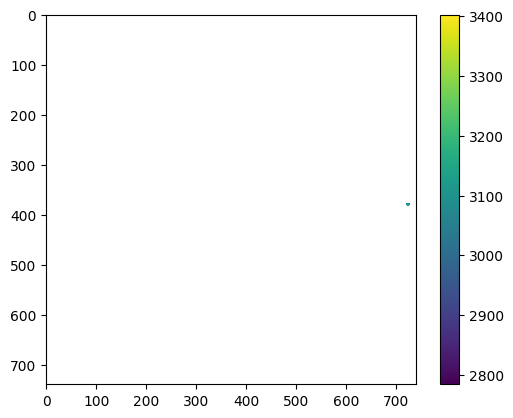

In [79]:
plt.imshow(cell_mask)
plt.colorbar()

In [86]:
def imnorm(im):
    return (im - im.min()) / (im.max() - im.min())

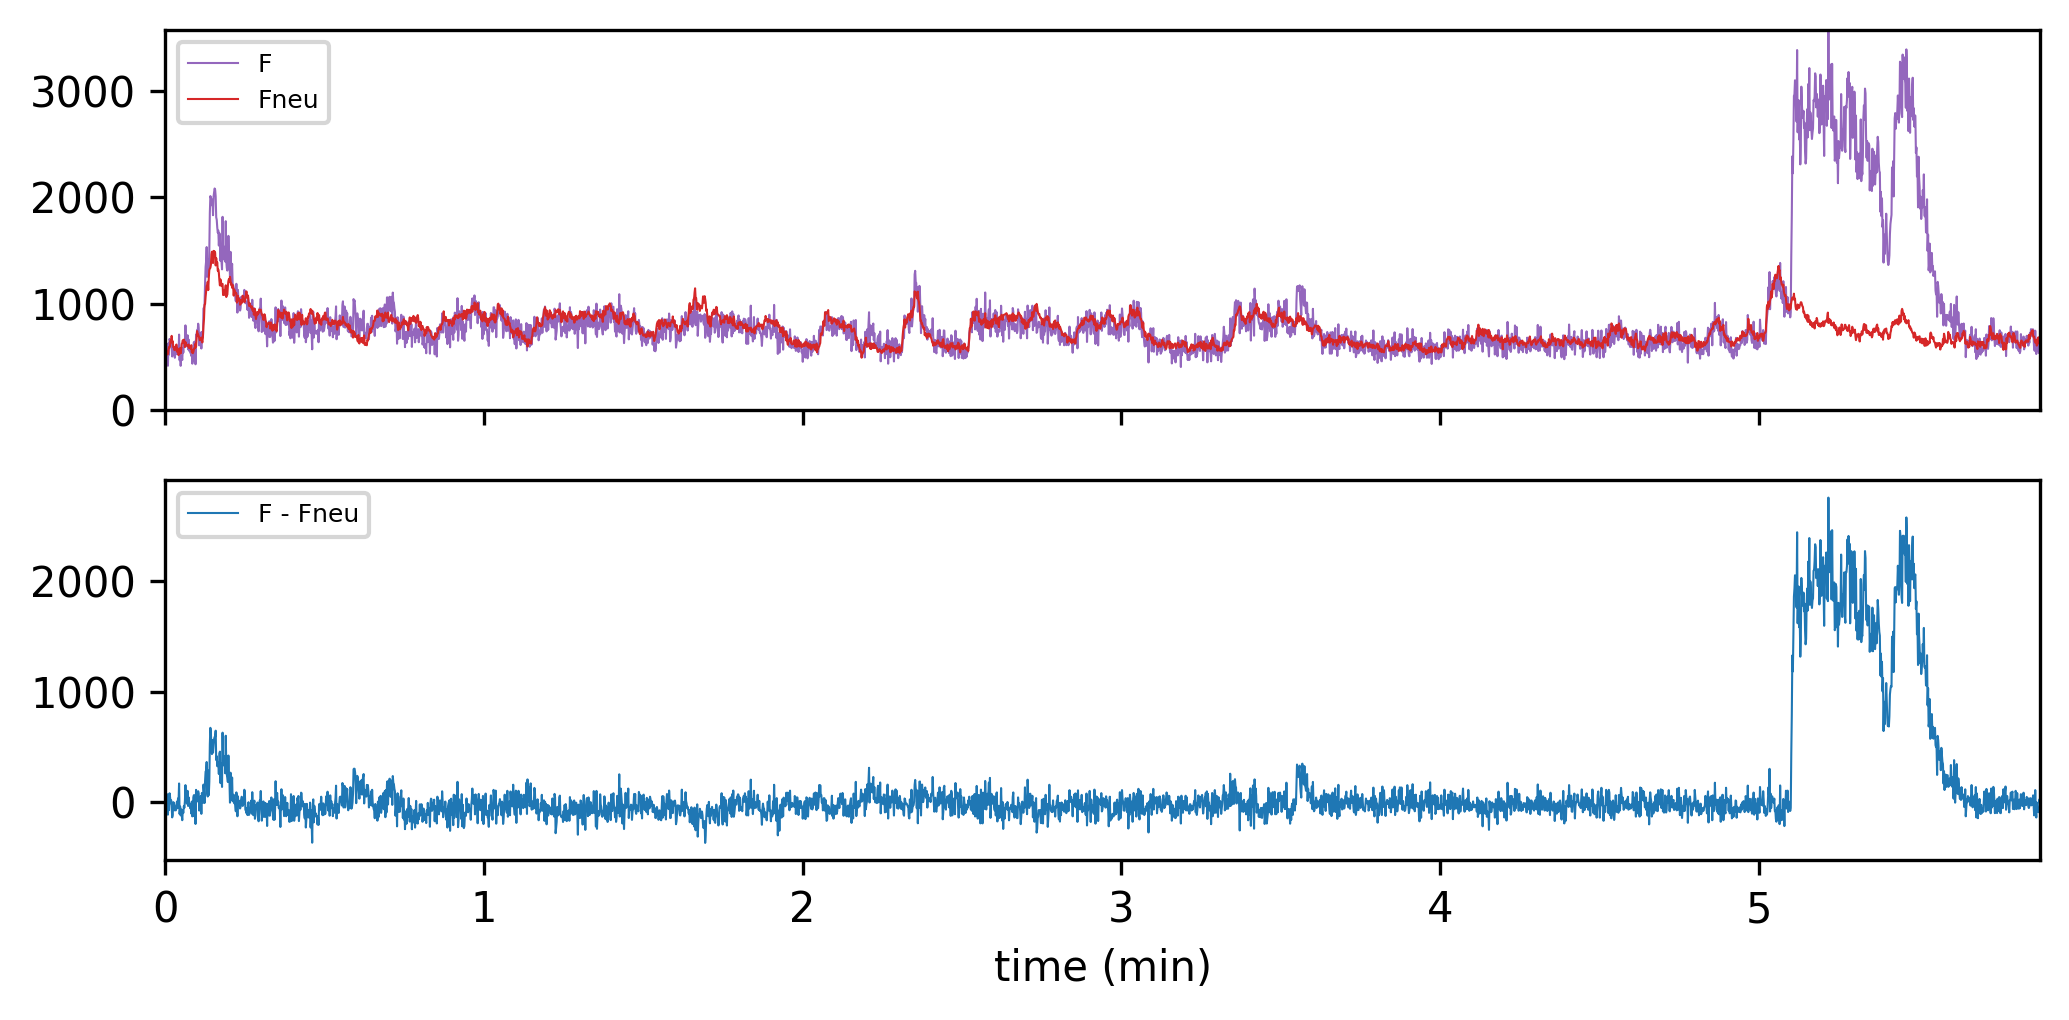

In [213]:
Fsub = F[0].copy() - Fneu[0].copy()

fakeT = np.linspace(0, 3530/10/60, np.size(F, 1))

fig, [ax0,ax1] = plt.subplots(2,1, figsize=(7,3.5), dpi=300)

ax0.plot(fakeT, F[0], linewidth=0.5, color='tab:purple', label='F')
ax0.plot(fakeT, Fneu[0], linewidth=0.5, color='tab:red', label='Fneu')
ax0.set_ylim([0, np.max([np.max(F[0]), np.max(Fneu[0])])])
ax0.legend(fontsize=6)
ax0.set_xlim([0, fakeT[-1]])
ax0.set_xticks(np.arange(0, fakeT[-1], np.round(fakeT[-1]/6, 1)).astype(int), labels=[])

ax1.plot(fakeT, Fsub, linewidth=0.5, color='tab:blue', label='F - Fneu')
# ax1.set_ylim(0, np.max(Fsub))
ax1.legend(fontsize=6)
ax1.set_xlim([0, fakeT[-1]])
ax1.set_xticks(np.arange(0, fakeT[-1], np.round(fakeT[-1]/6, 1)).astype(int))
ax1.set_xlabel('time (min)')

fig.tight_layout()

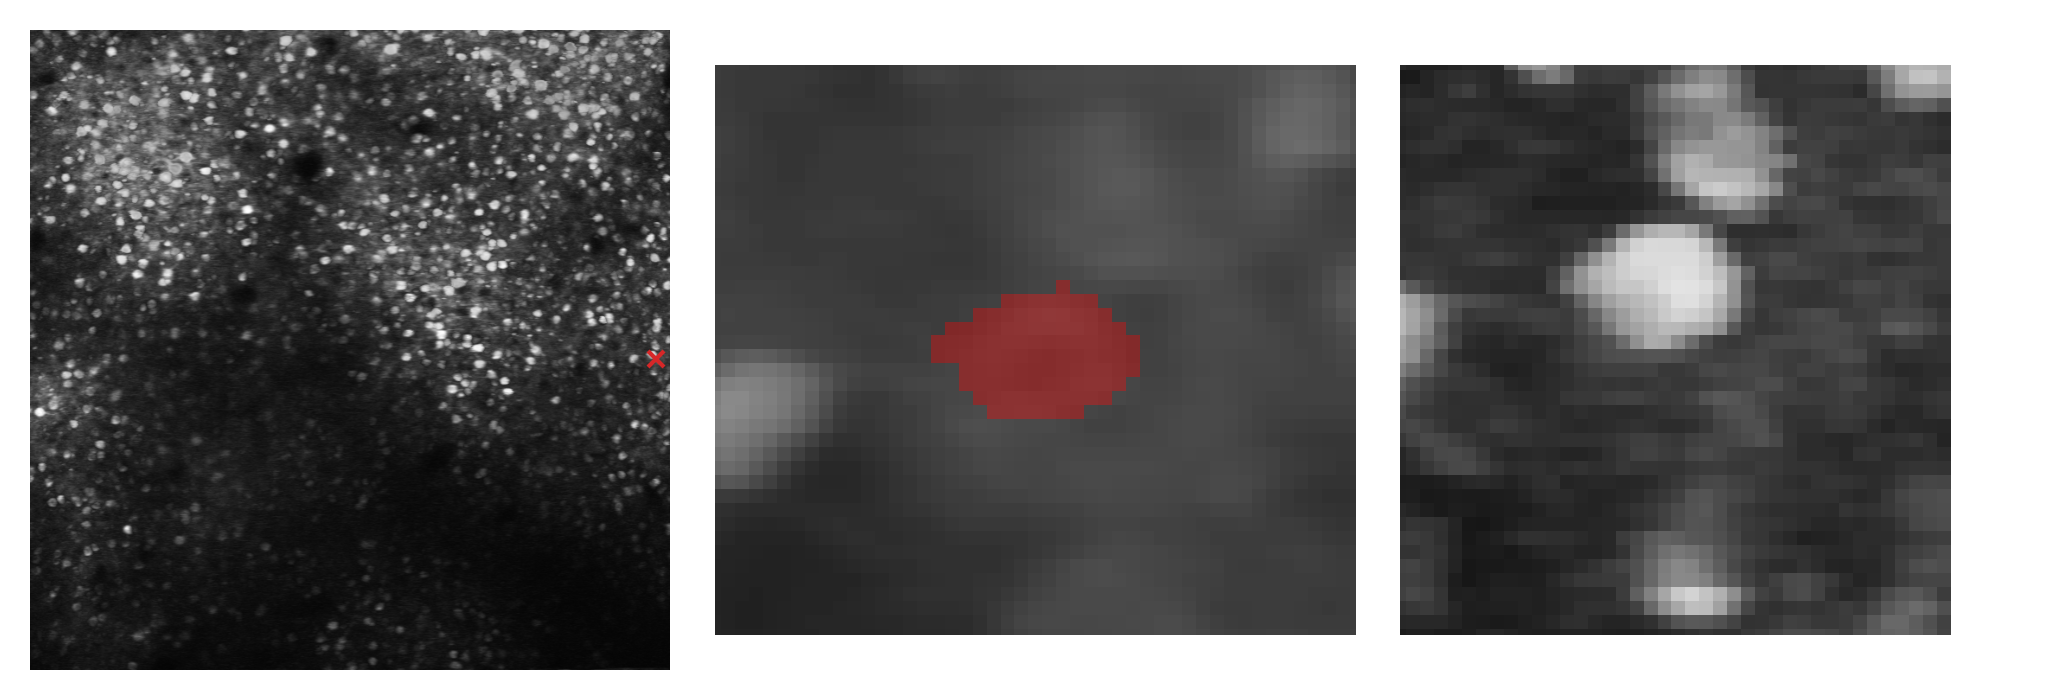

In [211]:
xy = np.stack([stat[0]['xpix'], stat[0]['ypix']])
d = stat[0]['radius'] * 3
bbox_x = ([np.min(xy[0,:]-d), np.max(xy[0,:])+d])
bbox_y = ([np.max(xy[1,:])+d, np.min(xy[1,:]-d)])

maxproj = ops.item()['max_proj'].copy()
meanim = ops.item()['meanImg'].copy()

cell_mask = np.zeros(meanim.shape)
cell_mask[xy[1,:], xy[0,:]] = 1

fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize=(7,2.5), dpi=300)
ax0.imshow(maxproj, cmap='gray', vmin=0)
ax0.plot(np.median(xy[0,:]),
         np.median(xy[1,:]),'x', color='tab:red', markersize=4)
ax0.axis('off')

ax1.imshow(meanim, cmap='gray')
ax1.imshow(cell_mask, cmap=t2b, alpha=0.35)
ax1.set_xlim(bbox_x)
ax1.set_ylim(bbox_y)
ax1.axis('off')

ax2.imshow(maxproj, cmap='gray')
ax2.set_xlim(bbox_x)
ax2.set_ylim(bbox_y)
ax2.axis('off')

fig.tight_layout()

In [18]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [19]:
def draw_figure(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
    return figure_canvas_agg


In [21]:
sg.theme('Default1')

def cell_review(cell_id, celldict):

    # cell map

    # visualize this cell

    # plot cell trace

    # gather cell props

    layout = [
        [sg.Text('Cell {} (reviewing {}/{})'.format(1,3,10))],
        [sg.Canvas(key='map_canvas'), sg.Canvas(key='cell_canvas')],
        [sg.Multiline()]
        [sg.RadioButton('Bad', 'radlab', key='bad'),
        sg.RadioButton('Ignore', 'radlab', key='ok', default=True),
        sg.RadioButton('Good', 'radlab', key='good')],
        [sg.Button('Previous', allow_events=True, key='prev'),
         sg.Button('Next', allow_events=True, key='next'),
         sg.Button('Finish', allow_events=True, key='next')]
    ]

    w = sg.Window('Review Cells', layout, finalize=True, element_justification='center')

    fig_canvas_agg = draw_figure(w['cell_canvas'].TKCanvas, fig)

    event, values = window.read()

# window.close()

In [ ]:
def estimate_thresholds():
    

In [ ]:
def session_summary()

In [11]:
np.min(ops.item()['meanImg'].flatten())

71.563255

In [12]:
np.max(ops.item()['meanImg'].flatten())

2859.0579

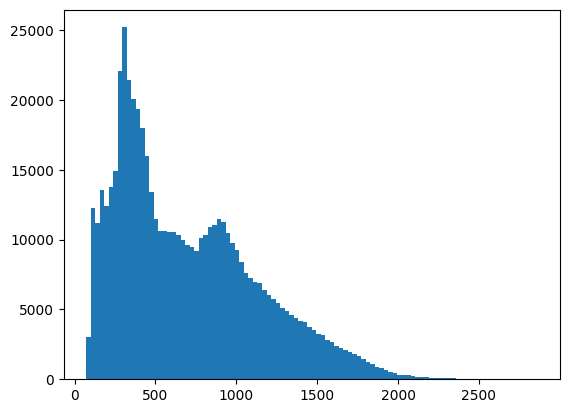

In [8]:
_ = plt.hist(ops.item()['meanImg'].flatten(), bins=100)